# Top-level simple experiment with the new version of echo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from echo import esn

In [34]:
Data = esn.Data
Reservoir = esn.Reservoir

data = Data.create_source('lorenz')
x,y = data.generate(1000)
model = Reservoir(100)
model.fit(x, y, skip=200)
z = model.predict(x)
loss = Data.loss(y[200:], z[200:])
print(loss)
assert loss > 0

0.00010573451734484156


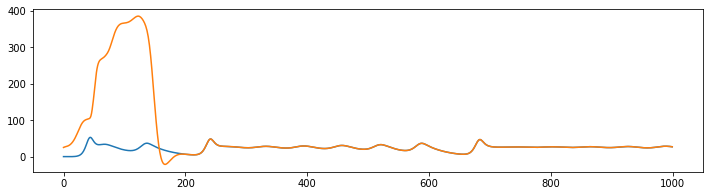

In [36]:
plt.figure(figsize=(12,3));
plt.plot(y);
plt.plot(z);